In [1]:
import pandas as pd
import seaborn as sns
breast_cancer = pd.read_csv('wdbc.data')
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets
from IPython.display import Image  
from sklearn import tree
import pydotplus
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
##This function is to help us to find the closest values to 1.
corr= breast_cancer.corr('pearson')
cm = sns.light_palette("green", as_cmap=True)
corr.style.background_gradient(cmap=cm)
##mean perimeter with mean fractal dimension, perimeter error with mean fractal dimension, texture error with mean fractal dimension. 
##keep texture error with mean fractal dimension.

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
mean radius,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,0.275869,0.386358,0.281673,0.259845,0.006614,0.191975,0.143293,0.163851,0.009127,0.054458,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
mean texture,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,0.691765,-0.086761,0.693135,0.744983,-0.202694,0.250744,0.228082,0.407217,-0.081629,-0.005523,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
mean perimeter,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,0.732562,-0.066280,0.726628,0.800086,-0.166777,0.212583,0.207660,0.372320,-0.072497,-0.019887,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
mean area,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,0.301467,0.068406,0.296092,0.246552,0.332375,0.318943,0.248396,0.380676,0.200774,0.283607,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
mean smoothness,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,0.497473,0.046205,0.548905,0.455653,0.135299,0.738722,0.570517,0.642262,0.229977,0.507318,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
mean compactness,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,0.631925,0.076218,0.660391,0.617427,0.098564,0.670279,0.691270,0.683260,0.178009,0.449301,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
mean concavity,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,0.698050,0.021480,0.710650,0.690299,0.027653,0.490424,0.439167,0.615634,0.095351,0.257584,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
mean concave points,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,0.303379,0.128053,0.313893,0.223970,0.187321,0.421659,0.342627,0.393298,0.449137,0.331786,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
mean symmetry,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,0.000111,0.164174,0.039830,-0.090170,0.401964,0.559837,0.446630,0.341198,0.345007,0.688132,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297
mean fractal dimension,0.275869,0.691765,0.732562,0.301467,0.497473,0.631925,0.698050,0.303379,0.000111,1.000000,0.213247,0.972794,0.951830,0.164514,0.356065,0.332358,0.513346,0.240567,0.227754,0.715065,0.194799,0.719684,0.751548,0.141919,0.287103,0.380585,0.531062,0.094543,0.049559


In [3]:
clf = DecisionTreeClassifier(random_state=0)
breast_cancer = load_breast_cancer()
cross_val_score(clf, breast_cancer.data, breast_cancer.target, cv=10)

array([0.96491228, 0.84210526, 0.9122807 , 0.89473684, 0.92982456,
       0.89473684, 0.9122807 , 0.94736842, 0.92982456, 0.94642857])

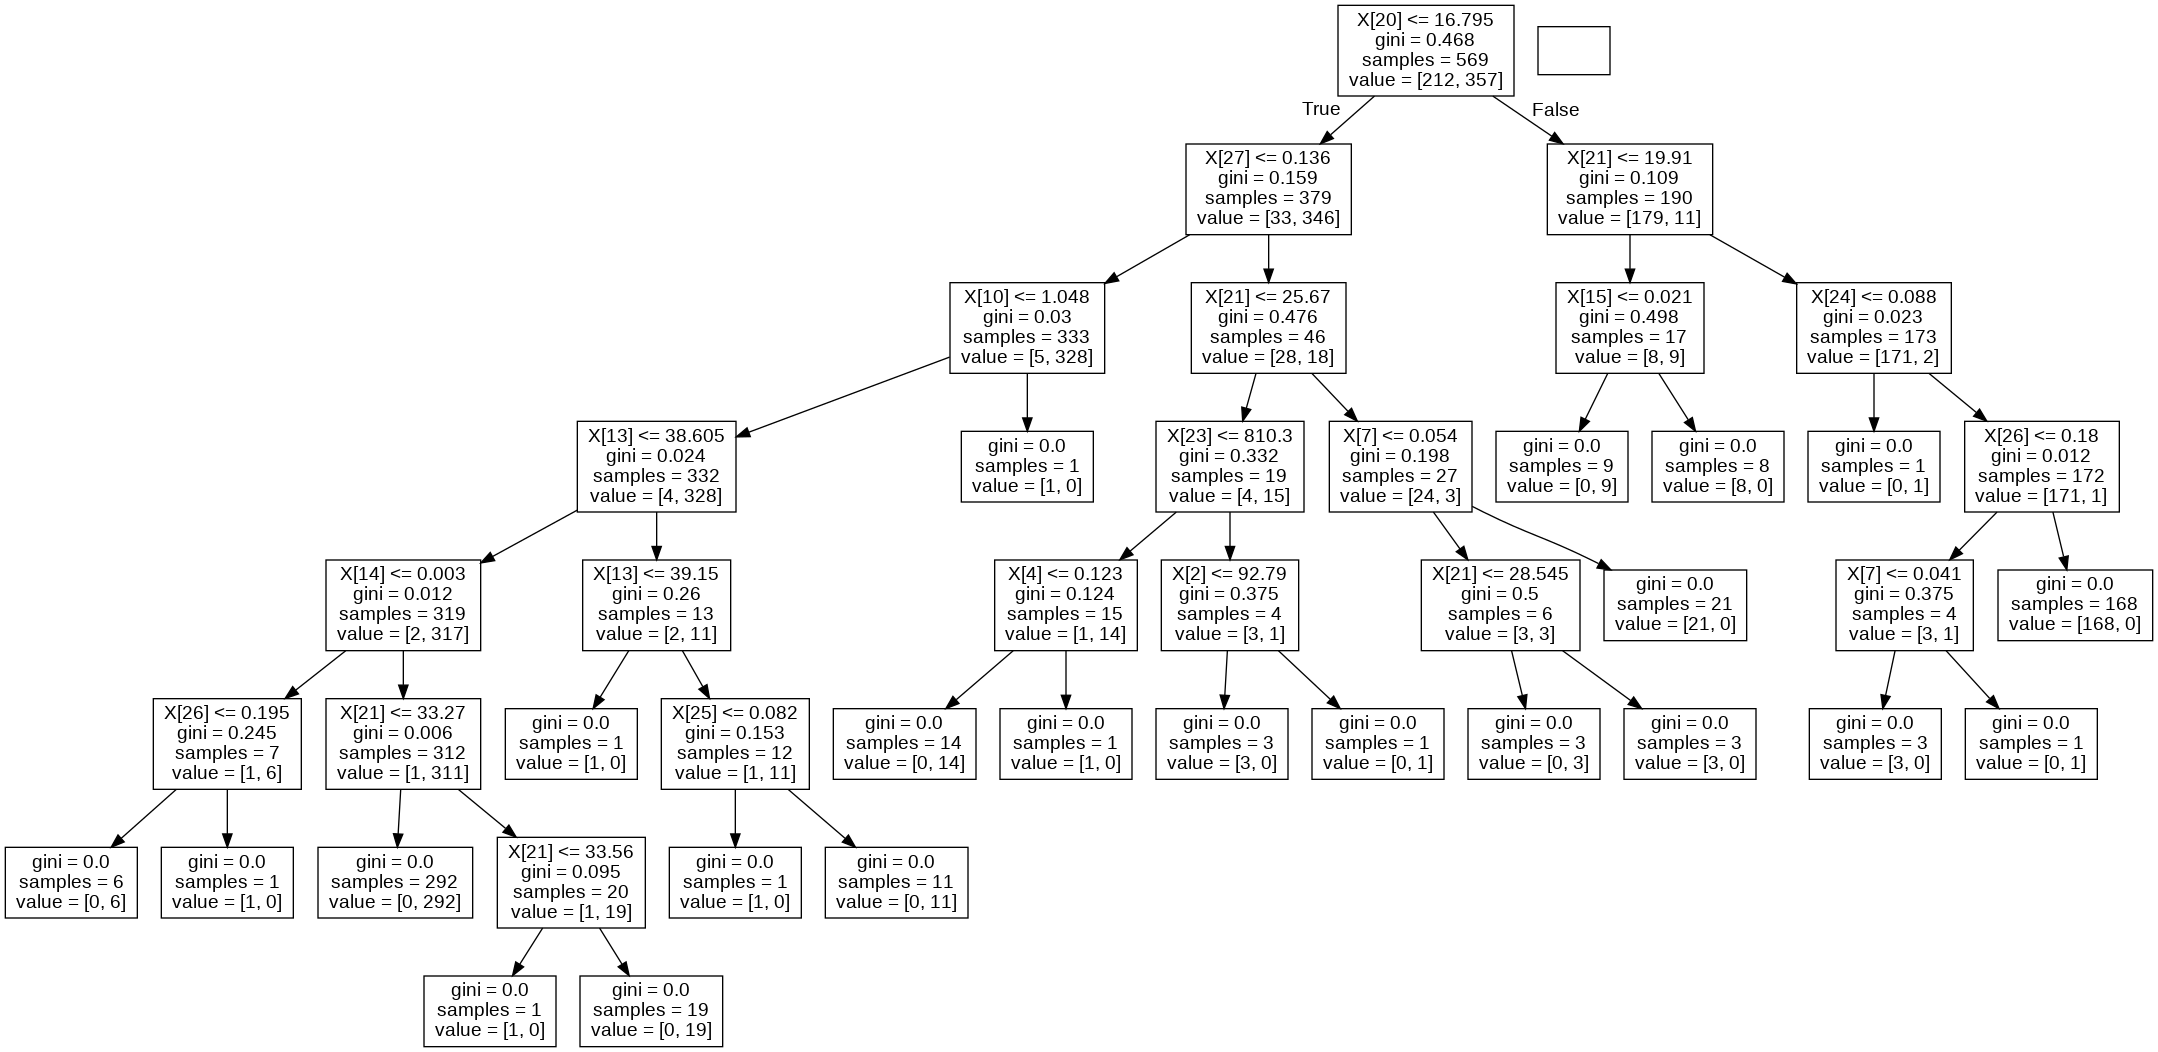

In [4]:

## let's get the data set features
features = breast_cancer.data
## get the class labels
labels = breast_cancer.target

clf = clf.fit(features, labels)
dot_data = tree.export_graphviz(clf)

graph = pydotplus.graph_from_dot_data(dot_data)
## get the png version of the graph
graph.write_png('breast_cancer.png')
## get the pdf version of the graph
graph.write_pdf('breast_cancer.pdf')
# Show graph
Image(graph.create_png())

##Using all features

In [5]:

features_train, features_test, labels_train, labels_test = train_test_split(features, labels, train_size = 0.7)

clf = tree.DecisionTreeClassifier().fit(features_train, labels_train)

predicted_labels_train = clf.predict(features_train)
accuracy_train = accuracy_score(labels_train, predicted_labels_train)
print('classifier accuracy train:', accuracy_train)

predicted_labels_test = clf.predict(features_test)
accuracy_test = accuracy_score(labels_test, predicted_labels_test)
print('classifier accuracy test:', accuracy_test)


classifier accuracy train: 1.0
classifier accuracy test: 0.9298245614035088


##Using subset features

In [6]:
## let's get the data set features
subset_features = [breast_cancer.data[9], breast_cancer.data[11]]
## get the class labels
subset_labels = [breast_cancer.target[9], breast_cancer.target[11]]

subset_features_train, subset_features_test, subset_labels_train, subset_labels_test = train_test_split( subset_features, subset_labels, test_size = 0.3)

clf = tree.DecisionTreeClassifier().fit(subset_features_train, subset_labels_train)

predicted_subset_labels_train = clf.predict(subset_features_train)
accuracy_subset_train = accuracy_score(subset_labels_train, predicted_subset_labels_train)
print('classifier accuracy train:', accuracy_subset_train)

predicted_subset_labels_test = clf.predict(subset_features_test)
accuracy_subset_test = accuracy_score(subset_labels_test, predicted_subset_labels_test)
print('classifier accuracy test:', accuracy_subset_test)


classifier accuracy train: 1.0
classifier accuracy test: 1.0


##Discussion:

For both models, the classifier accuracy of the training dataset is perfect(=100%/=1) and that's normal because a statistical model that is complex enough can perfectly fit(overfit) to any learning dataset and obtain 100% accuracy on it.

For the first model, the classifier accuracy of the testing dataset is changing every time but it never reaches 1. That may be because from the split we give just 30% for the test data. For the second model, the classifier accuracy of the testing dataset is perfect(=100%/=1) and that's because the subset is highly correlated.
